In [39]:
import numpy as np 
import pandas as pd
df = pd.read_csv('train.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
gender = {'male': 1,'female': 0}
df.Sex = [gender[item] for item in df.Sex]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [42]:
#correlation between Survived and Sex
df['Survived'].corr(df['Sex'])

-0.5433513806577553

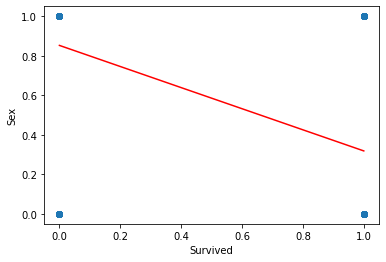

In [99]:
import matplotlib.pyplot as plt
plt.scatter(df['Survived'], df['Sex'])
#Using scatter plot
plt.plot(np.unique(df['Survived']), np.poly1d(np.polyfit(df['Survived'], df['Sex'], 1))
         (np.unique(df['Survived'])), color='red')
# Setting the X and Y labels
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.show()

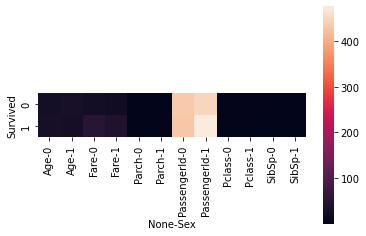

In [57]:
#visualization using heatmap
import seaborn as sns
#plotting the heatmap for correlation
piv = pd.pivot_table(df,index=["Survived"], columns=["Sex"], fill_value=0)
ax = sns.heatmap(piv, square=True)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90 )
plt.show()

In [105]:
#implementing Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
classifier = MultinomialNB()
x = np.asarray(df[['Pclass', 'SibSp','Fare']])
y = df.loc[:,'Survived']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy is',accuracy_score(y_pred,y_test))

Accuracy is 0.664179104477612


In [109]:
#Glass Dataset
import warnings
warnings.filterwarnings('always')
dataSet= pd.read_csv('glass.csv')
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
classifier = MultinomialNB()
x = dataSet.loc[:,dataSet.columns!='Type']
y = dataSet.loc[:,'Type']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred,zero_division=0))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.65      0.69      0.67        16
           2       0.54      0.82      0.65        17
           3       0.00      0.00      0.00         5
           5       1.00      0.25      0.40         4
           6       0.00      0.00      0.00         3
           7       0.80      0.89      0.84         9

    accuracy                           0.63        54
   macro avg       0.50      0.44      0.43        54
weighted avg       0.57      0.63      0.57        54

Accuracy is 0.6296296296296297


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
import pandas as pd
import numpy as np
x = dataSet.loc[:,dataSet.columns!='Type']
y = dataSet.loc[:,'Type']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model=svm.SVC(kernel='linear',C=10,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred = classifier.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred,zero_division=0))
# Accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.50      0.21      0.30        14
           2       0.59      0.92      0.72        25
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         4
           6       0.00      0.00      0.00         1
           7       0.57      0.80      0.67         5

    accuracy                           0.59        54
   macro avg       0.44      0.41      0.39        54
weighted avg       0.53      0.59      0.52        54

Accuracy is 0.5925925925925926


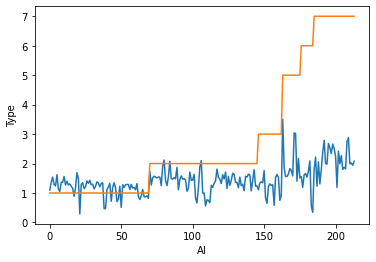

In [100]:
#Visualizations using scatter plot
import matplotlib.pyplot as plt
# Scatter plot with day against tip
plt.plot(dataSet['Al'])
plt.plot(dataSet['Type'])
# Adding Title to the Plot
# Setting the X and Y labels
plt.xlabel('Al')
plt.ylabel('Type')
plt.show()

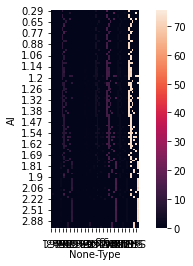

In [102]:
#visualization using heatmap
import seaborn as sns
#plotting the heatmap for correlation
piv = pd.pivot_table(dataSet,index=["Al"], columns=["Type"], fill_value=0)
ax = sns.heatmap(piv, square=True)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0 )
plt.show()